In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium



# follow on linked in

https://www.linkedin.com/in/jeevan-reddy-y/

# connecting with the the mysql database

In [2]:

conn = mysql.connector.connect(
    host='localhost',
    user="root",
    passwd='1234',
    database='yelp'
)


In [3]:
c= conn.cursor()

# seeing the all tables in the database

In [4]:
c.execute("select * from tips")
result=c.fetchall()
c.execute("DESCRIBE tips")
col=[i[0] for i in c]


df=pd.DataFrame(result,columns=col)

In [5]:
pd.read_sql_query("show tables",conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\328440540.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("show tables",conn)


,Tables_in_yelp
0,business
1,checkin
2,review
3,tips
4,user


In [6]:
pd.read_sql_query("select * from business",conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\3636924752.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("select * from business",conn)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.4267,-119.7110,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.5511,-90.3357,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.2232,-110.8800,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.9555,-75.1556,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.3382,-75.4717,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.4684,-113.4920,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.1151,-86.7669,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.9087,-86.0651,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.7824,-89.9506,4.0,24,1,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


# getting the business id which are in open for the further analysis

In [7]:


business_id=pd.read_sql_query("select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open=1",conn)



C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\2099932618.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  business_id=pd.read_sql_query("select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open=1",conn)


In [8]:
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


# count_restrunt_business

In [9]:

pd.read_sql_query("select count(business_id) from business where lower(categories) like '%restaurant%' and is_open=1",conn)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\2891353160.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("select count(business_id) from business where lower(categories) like '%restaurant%' and is_open=1",conn)


,count(business_id)
0,35004


In [10]:
pd.read_sql_query("""
    SELECT 
        MIN(review_count) AS min_review_count,
        MAX(review_count) AS max_review_count,
        AVG(review_count) AS avg_review_count 
    FROM 
        business 
    WHERE 
        business_id IN {}""".format(tuple(business_id["business_id"])), conn)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\1436819809.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,min_review_count,max_review_count,avg_review_count
0,5,7568,104.0978


# detecting the ouliers

<Axes: >

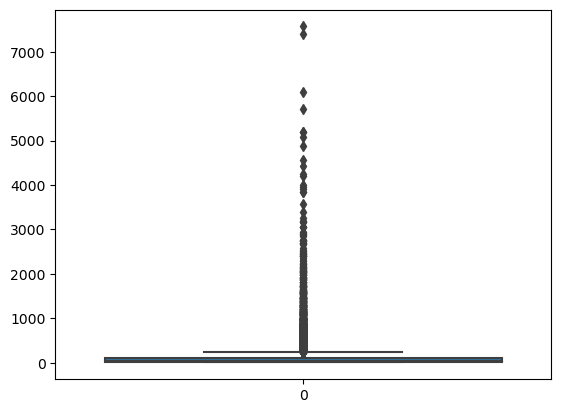

In [11]:
sns.boxplot(business_id["review_count"])

# fuction to remove the outliers

In [12]:
def remove_outliers(df, column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    
    IQR = Q3 - Q1
    
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_filtered


In [13]:
business_id=remove_outliers(business_id,"review_count")


# business id with out outliers

In [14]:

business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34998,sf_oQ62L8UEnOOLf00nNGA,6
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


# checking the central measure of tendency

In [15]:
pd.read_sql_query("""
    SELECT 
        MIN(review_count) AS min_review_count,
        MAX(review_count) AS max_review_count,
        AVG(review_count) AS avg_review_count 
    FROM 
        business 
    WHERE 
        business_id IN {}""".format(tuple(business_id["business_id"])), conn)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\1436819809.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,min_review_count,max_review_count,avg_review_count
0,5,248,55.9754


# restaurents with top review_count

In [16]:

query_result = pd.read_sql_query("""
    SELECT 
        name,
        SUM(review_count) AS review_count,
        AVG(stars) AS avg_stars
    FROM 
        business 
    WHERE 
        business_id IN {}
   
    GROUP BY 
        name
    ORDER BY 
        review_count DESC
    LIMIT 10""".format(tuple(business_id["business_id"])) , conn)



C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\321767784.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_result = pd.read_sql_query("""


In [17]:
query_result

,name,review_count,avg_stars
0,McDonald's,16490.0,1.868702
1,Chipotle Mexican Grill,9071.0,2.381757
2,Taco Bell,8017.0,2.141813
3,Chick-fil-A,7711.0,3.369427
4,First Watch,6761.0,3.875000
5,Panera Bread,6613.0,2.661905
6,Buffalo Wild Wings,6483.0,2.344828
7,Domino's Pizza,6091.0,2.290210
8,Wendy's,5930.0,2.030159
9,Chili's,5754.0,2.500000


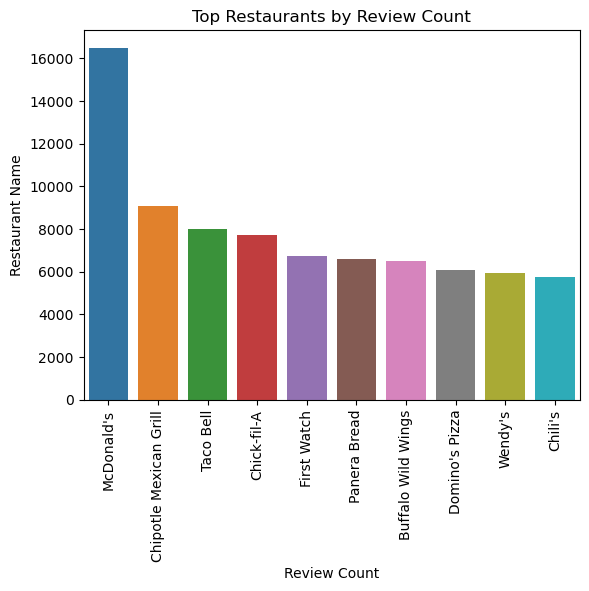

In [18]:
sns.barplot(x=query_result["name"],y=query_result["review_count"])
plt.xticks(rotation=90)
plt.xlabel('Review Count')
plt.ylabel('Restaurant Name')
plt.title('Top Restaurants by Review Count')
plt.show()

# restaurents with top stars

In [19]:

pd.read_sql_query("""
    SELECT 
        name,
        SUM(review_count) AS review_count,
        AVG(stars) AS avg_stars
    FROM 
        business 
    WHERE 
        business_id IN {}
   
    GROUP BY 
        name
    ORDER BY 
       avg(stars) DESC
    LIMIT 10""".format(tuple(business_id["business_id"])) , conn)



C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\434871878.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,name,review_count,avg_stars
0,The Mad Griddle,7.0,5.0
1,Palo De Azucar Cafe,5.0,5.0
2,Just Churros,25.0,5.0
3,Golden River Restaurant,8.0,5.0
4,Roundabout Catering,38.0,5.0
5,Pitas Republic,5.0,5.0
6,The Pepper Pott,18.0,5.0
7,Kimberton Whole Foods - Collegeville,6.0,5.0
8,Impasto,5.0,5.0
9,Island Fin Poké,111.0,5.0


# we need to make a sucess matric for the restaurent based on the tip, checkin count, review and rating


In [20]:
pd.read_sql_query("""select * from checkin
limit 1""",conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\2745932705.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""select * from checkin


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."


In [21]:

business_ids = tuple(business_id["business_id"])
 
query = """
SELECT 
    bb.business_id,
    AVG(bb.stars) AS avg_stars, 
    avg(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count
FROM 
    checkin cc
JOIN
    business bb ON cc.business_id = bb.business_id
WHERE 
    bb.business_id IN {}
GROUP BY 
    bb.business_id
order by checkin_count
""".format(business_ids)


df_checkin= pd.read_sql_query(query, conn)





C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\3231126860.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_checkin= pd.read_sql_query(query, conn)


# tips table

In [23]:
pd.read_sql_query("""select * from tips
order by compliment_count desc limit 3""",conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\4172636322.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""select * from tips


,user_id,business_id,text,date,compliment_count
0,661RwsBrt5ZbNhuipyhJcQ,x8-sTKZG59RUhgGj_kcyVg,Brandon. Come here for your bbq. Gush.,2016-06-11,6
1,tsMF0FcFcHZ8i28WzWtQXw,dsfRniRgfbDjC8os848B6A,Experience Bern's by sitting at the bar too . ...,2020-03-05,6
2,tsMF0FcFcHZ8i28WzWtQXw,pPpaOXOwcuO7z0sDghmOgw,Sumo oranges are in season. (Jan.- Mar.) They ...,2020-01-17,5


In [24]:

business_ids = tuple(business_id["business_id"])
 
query = """
SELECT 
    bb.business_id,
    AVG(bb.stars) AS avg_stars, 
    sum(tt.compliment_count) tip_count
FROM 
    tips tt
JOIN
    business bb ON tt.business_id = bb.business_id
WHERE 
    bb.business_id IN {}
GROUP BY 
    tt.business_id
order by avg_stars
""".format(business_ids)


df_tip= pd.read_sql_query(query, conn)


print(df_tip)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\2347396420.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tip= pd.read_sql_query(query, conn)


                  business_id  avg_stars  tip_count
0      k_mIcCFvXWuN8I4ofCta3g        1.0        0.0
1      q8b9QZuB-s6mwr4E5MZUaw        1.0        0.0
2      M3UgAH-Z9qU0IJrSZAIhBg        1.0        0.0
3      0UYn-R_LF-V0KSlYFRi3PA        1.0        0.0
4      BNX5xc90hgr1IEM18iCDfQ        1.0        0.0
...                       ...        ...        ...
27826  kT8IlV47kz1rz2lTuNyO1w        5.0        0.0
27827  0RSws84Im4CsZ-W9biXv2g        5.0        0.0
27828  9M_lsr1093yifMKsXjQQzg        5.0        0.0
27829  562EHk55n8A_Uo1katVcpw        5.0        0.0
27830  OQSihGXRZqKMeW5vSNVwhQ        5.0        0.0

[27831 rows x 3 columns]


<Axes: xlabel='avg_stars', ylabel='tip_count'>

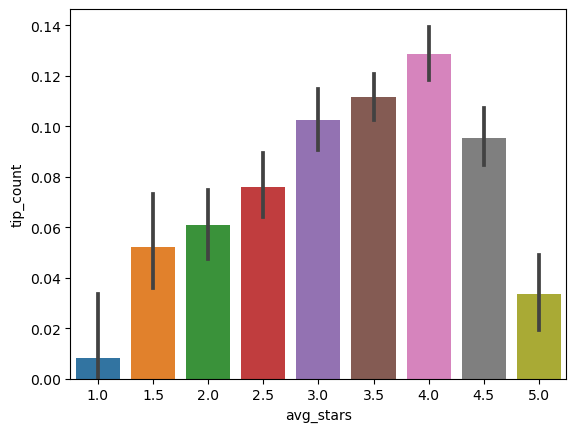

In [25]:
sns.barplot(x=df_tip["avg_stars"],y=df_tip["tip_count"])

# stars with review count

In [26]:

business_ids = tuple(business_id["business_id"])
 
query = """
SELECT 
    business_id,
    AVG(stars) AS avg_stars, 
    avg(review_count) review_count
FROM 
    business

WHERE 
    business_id IN {}
GROUP BY 
    business_id
order by review_count
""".format(business_ids)


df_review_count= pd.read_sql_query(query, conn)


print(df_review_count)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\3718512401.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_review_count= pd.read_sql_query(query, conn)


                  business_id  avg_stars  review_count
0      5BI5I1RAftA59uwsN47YFQ        1.5           5.0
1      -x-niT6JolhXi6VuKclgxw        2.0           5.0
2      dsSs9tWCqDOKcq-lsql5cA        3.0           5.0
3      ozQEqZa1xm8D3MGgqN8ahA        5.0           5.0
4      L9ChgLw9P5gTZs2ZEFVpyg        4.5           5.0
...                       ...        ...           ...
31532  98WBvrn7wzu_93zc7fRfzQ        4.0         248.0
31533  MTB9CelShC-x4jj31BJYAg        3.5         248.0
31534  wPQWqLxY6t3-yRBNPPAmkQ        4.0         248.0
31535  y8gjlpJA89qDRCLC0JQaew        4.0         248.0
31536  HI1zbZuujFH9yPBKP1GH6g        4.5         248.0

[31537 rows x 3 columns]


<Axes: xlabel='avg_stars', ylabel='review_count'>

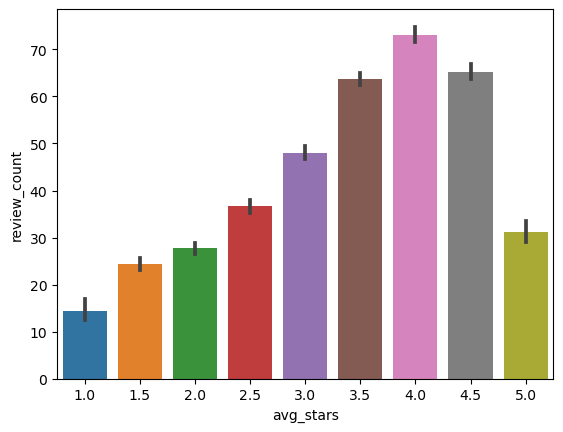

In [27]:
sns.barplot(x=df_review_count["avg_stars"],y=df_review_count["review_count"])

# joing all data frames

In [28]:
df_merged_1 = pd.merge(df_review_count, df_tip, on='business_id', how='outer')

In [29]:
df_merged_1=df_merged_1.drop("avg_stars_y",axis=1)

In [30]:
df_merged_1

,business_id,avg_stars_x,review_count,tip_count
0,5BI5I1RAftA59uwsN47YFQ,1.5,5.0,NaN
1,-x-niT6JolhXi6VuKclgxw,2.0,5.0,NaN
2,dsSs9tWCqDOKcq-lsql5cA,3.0,5.0,NaN
3,ozQEqZa1xm8D3MGgqN8ahA,5.0,5.0,NaN
4,L9ChgLw9P5gTZs2ZEFVpyg,4.5,5.0,NaN
...,...,...,...,...
31532,98WBvrn7wzu_93zc7fRfzQ,4.0,248.0,0.0
31533,MTB9CelShC-x4jj31BJYAg,3.5,248.0,0.0
31534,wPQWqLxY6t3-yRBNPPAmkQ,4.0,248.0,0.0
31535,y8gjlpJA89qDRCLC0JQaew,4.0,248.0,0.0


In [31]:
df_merged_final = pd.merge(df_merged_1, df_checkin, on='business_id', how='outer')


In [32]:
df_merged_final=df_merged_final.drop("avg_stars_x",axis=1)

In [33]:
df_merged_final.dropna(inplace=True)

In [36]:
grouped_df = df_merged_final.groupby('business_id').mean()[['review_count', 'tip_count', 'avg_stars', 'checkin_count']]


In [37]:
grouped_df.reset_index(inplace=True)

In [38]:
grouped_df.drop(["business_id",'avg_stars'],axis=1,inplace=True)

In [39]:
grouped_df

,review_count,tip_count,checkin_count
0,24.0,0.0,11.0
1,14.0,0.0,10.0
2,34.0,0.0,118.0
3,15.0,0.0,21.0
4,135.0,0.0,500.0
...,...,...,...
27657,19.0,0.0,6.0
27658,86.0,0.0,292.0
27659,6.0,1.0,20.0
27660,47.0,0.0,27.0


# correclation  matrix review_count,	tip_count,	checkin_count

In [42]:
grouped_df.corr()

,review_count,tip_count,checkin_count
review_count,1.000000,0.229466,0.626884
tip_count,0.229466,1.000000,0.260601
checkin_count,0.626884,0.260601,1.000000


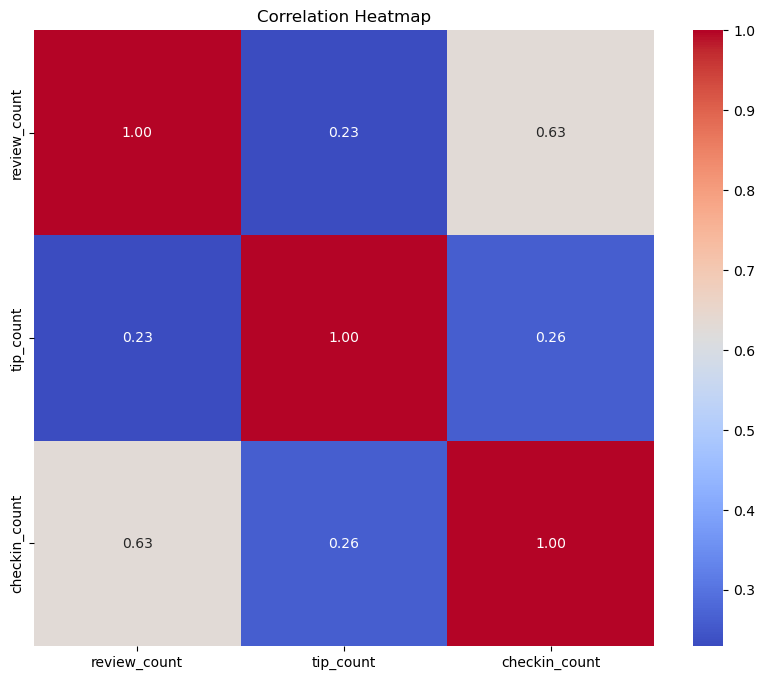

In [43]:

correlation_matrix = grouped_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# sucess matris across all stes and cities

In [44]:
business_ids = tuple(business_id["business_id"])
query=""" select state , city , avg(latitude) as latitude , avg(longitude) as longitude , avg(stars) as avg_rating , sum(review_count) as review_count,
 count(*) as restaurant_count 
 from business
 WHERE 
    business_id IN {}
 group by state,city 
 order by review_count desc
 limit 10""".format(business_ids)

df=pd.read_sql_query(query,conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\4172420318.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query,conn)


# fuction to caliculate the sucess score

In [45]:
def cal_success_metrics(df):
    score_list=[]
    for index,row in df.iterrows():
        score=row['avg_rating']*np.log(row['review_count']+1)
        score_list.append(score)
    return score_list

In [46]:
df["success_score"]=cal_success_metrics(df)

In [47]:
df

,state,city,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,PA,Philadelphia,39.982274,-75.150003,3.532312,175606.0,3002,42.656211
1,FL,Tampa,28.001731,-82.476943,3.568274,104751.0,1721,41.246934
2,IN,Indianapolis,39.802349,-86.141398,3.412111,92639.0,1701,39.022521
3,AZ,Tucson,32.233891,-110.936402,3.383885,91672.0,1421,38.664208
4,TN,Nashville,36.142252,-86.770107,3.491465,87100.0,1406,39.714800
5,LA,New Orleans,29.961270,-90.075372,3.694472,69309.0,1013,41.179856
6,MO,Saint Louis,38.616387,-90.302794,3.414303,51490.0,811,37.042331
7,NV,Reno,39.507601,-119.806460,3.479695,48569.0,591,37.548563
8,AB,Edmonton,53.526310,-113.514226,3.509367,45986.0,1548,37.676963
9,ID,Boise,43.608537,-116.239164,3.558824,36104.0,561,37.346958


# ploting the sucess score in the map

In [48]:


m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)

def get_color(success_score):
    if success_score >= 40:
        return 'green'
    elif success_score >= 38:
        return 'orange'
    else:
        return 'red'

# Add markers to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"City: {row['city']}<br>"
            f"State: {row['state']}<br>"
            f"Success Score: {row['success_score']}"
        ),
        icon=folium.Icon(color=get_color(row['success_score']))
    ).add_to(m)

m.save('success_score_map.html')

m


# hight counstomer engagement

In [55]:
business_ids = tuple(business_id["business_id"])
high_eng=pd.read_sql_query("""select  date_format(t.date,'%m-%Y') as month_year,

sum(b.review_count) as review_count,
count(*) as tip_count
 from business b
join tips t on t.business_id=b.business_id
where t.business_id in {} and b.stars >=3.5
group by month_year
order by month_year


""".format(business_ids),conn)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\893187614.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  high_eng=pd.read_sql_query("""select  date_format(t.date,'%m-%Y') as month_year,


In [59]:
# taking recent 10 years data

In [57]:
high_eng=high_eng[144:]

In [58]:
high_eng

,month_year,review_count,tip_count
144,12-2012,146078.0,1148
145,12-2013,159110.0,1278
146,12-2014,131882.0,1065
147,12-2015,182323.0,1457
148,12-2016,186050.0,1540
149,12-2017,177815.0,1477
150,12-2018,144076.0,1163
151,12-2019,128644.0,1161
152,12-2020,96494.0,937
153,12-2021,62844.0,652


# low coustomeer engagemnt

In [60]:
business_ids = tuple(business_id["business_id"])
low_eng=pd.read_sql_query("""select  date_format(t.date,'%m-%Y') as month_year,

sum(b.review_count) as review_count,
count(*) as tip_count
 from business b
join tips t on t.business_id=b.business_id
where t.business_id in {} and b.stars <3.5
group by month_year
order by month_year


""".format(business_ids),conn)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\442194646.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  low_eng=pd.read_sql_query("""select  date_format(t.date,'%m-%Y') as month_year,


In [61]:
# taking recent 10 years data

In [62]:
low_eng=low_eng[144:]

# last 10 years  seasonal rating

In [63]:
pd.read_sql_query("""select * from review
limit 10
""",conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\730531397.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""select * from review


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25


In [64]:
business_ids = tuple(business_id["business_id"])

df_time_rating_bottum=pd.read_sql_query("""SELECT DATE_FORMAT(date, '%m-%Y') AS month_year,
       AVG(stars) AS avg_rating
FROM review
WHERE business_id IN {}
GROUP BY month_year
ORDER BY month_year



""".format(business_ids),conn)


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\162315339.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_time_rating_bottum=pd.read_sql_query("""SELECT DATE_FORMAT(date, '%m-%Y') AS month_year,


In [67]:
## taking recent 10 years data

In [70]:
df_time_rating_recent=df_time_rating_bottum[192:]

<Axes: xlabel='month_year', ylabel='avg_rating'>

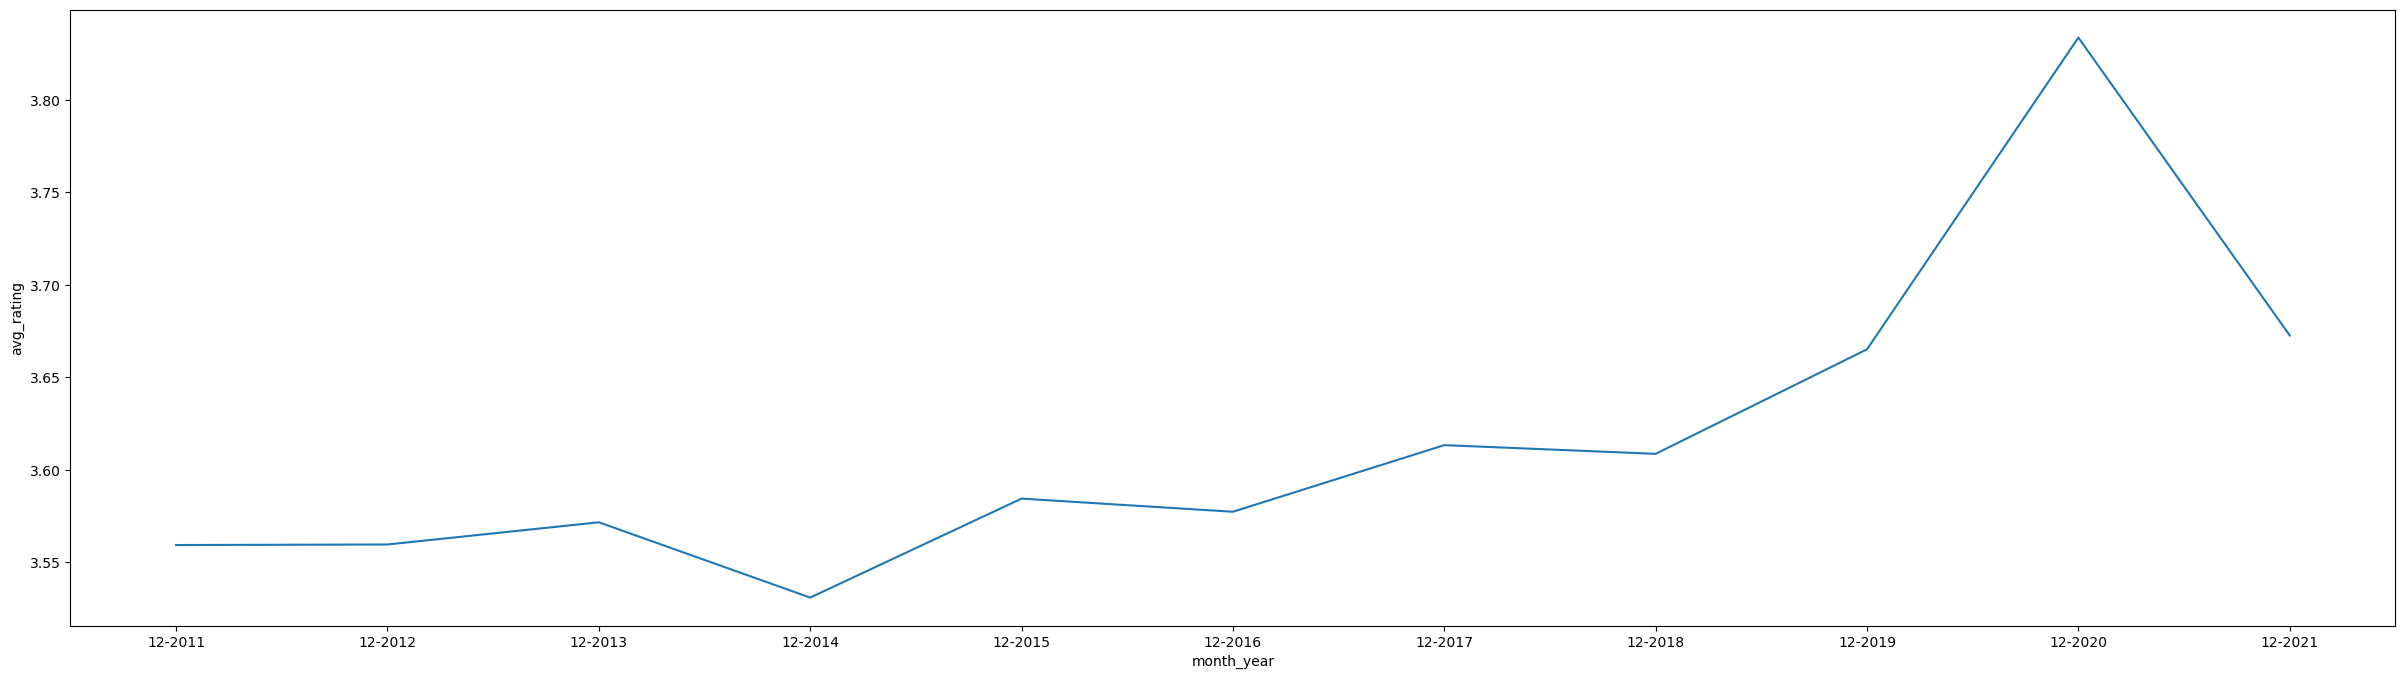

In [73]:
plt.figure(figsize=(30,8))
sns.lineplot(x=df_time_rating_recent["month_year"],y=df_time_rating_recent["avg_rating"])

# tip vs high and low engagement over time

In [74]:
high_eng

,month_year,review_count,tip_count
144,12-2012,146078.0,1148
145,12-2013,159110.0,1278
146,12-2014,131882.0,1065
147,12-2015,182323.0,1457
148,12-2016,186050.0,1540
149,12-2017,177815.0,1477
150,12-2018,144076.0,1163
151,12-2019,128644.0,1161
152,12-2020,96494.0,937
153,12-2021,62844.0,652


<Axes: xlabel='month_year', ylabel='tip_count'>

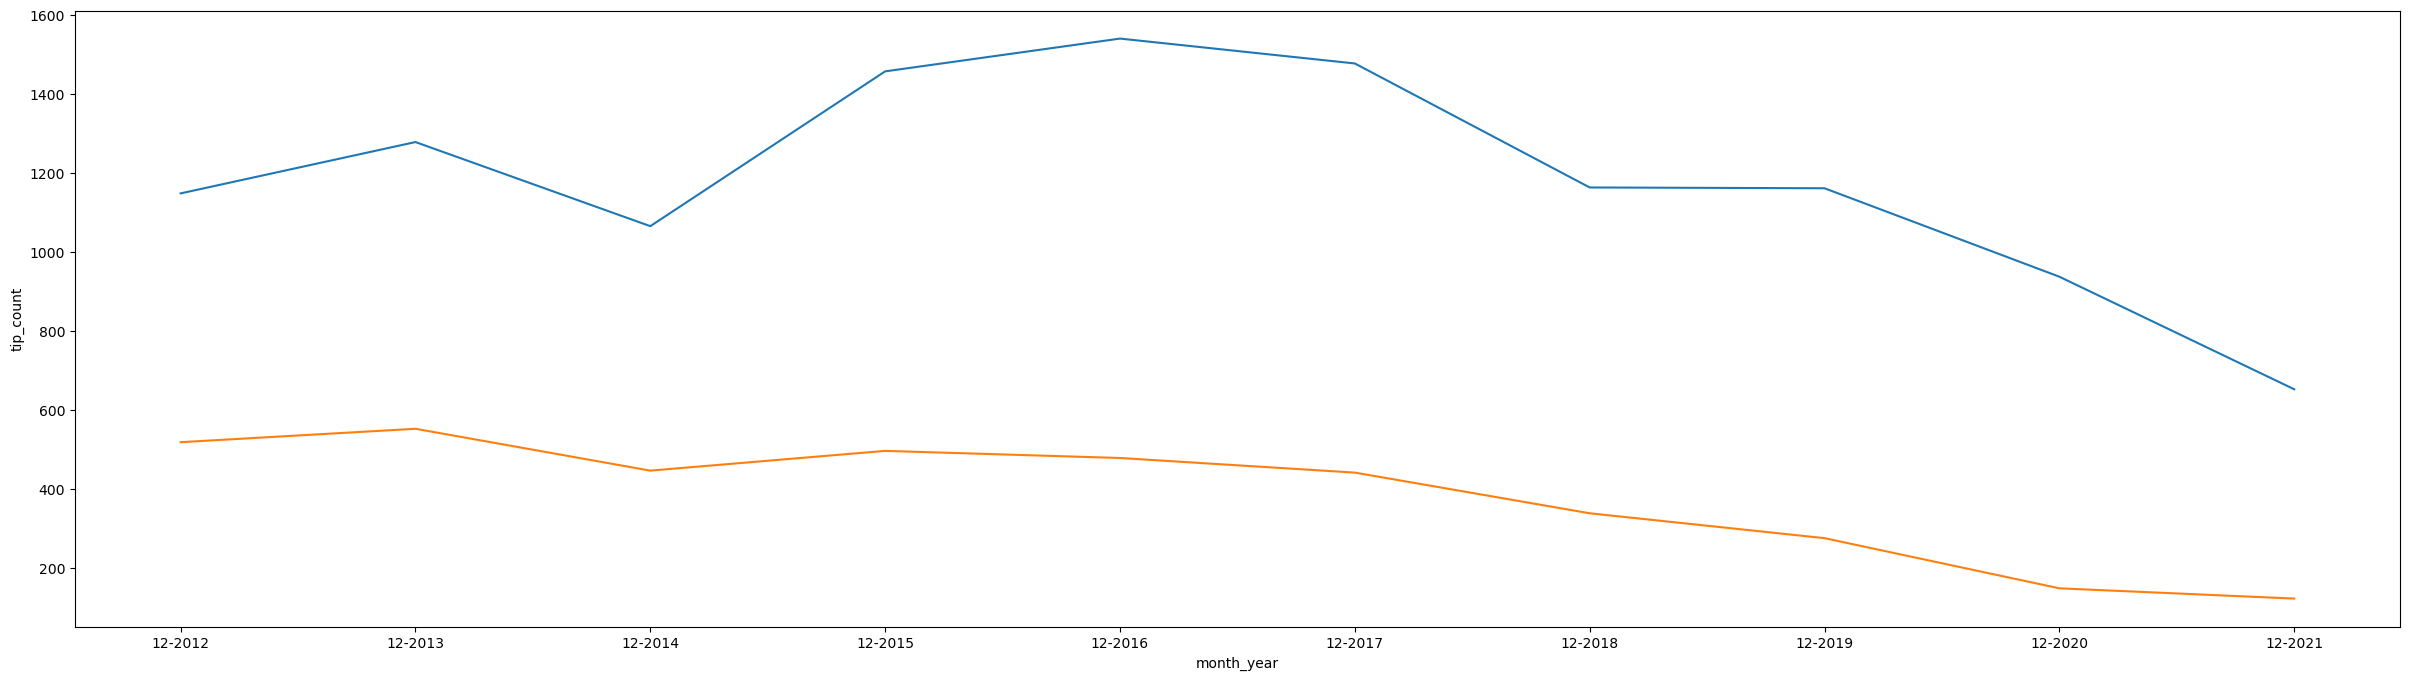

In [75]:

plt.figure(figsize=(30,8))
sns.lineplot(x=high_eng["month_year"],y=high_eng["tip_count"])
sns.lineplot(x=low_eng["month_year"],y=low_eng["tip_count"])

# review  vs high and low engagement over time

<Axes: xlabel='month_year', ylabel='review_count'>

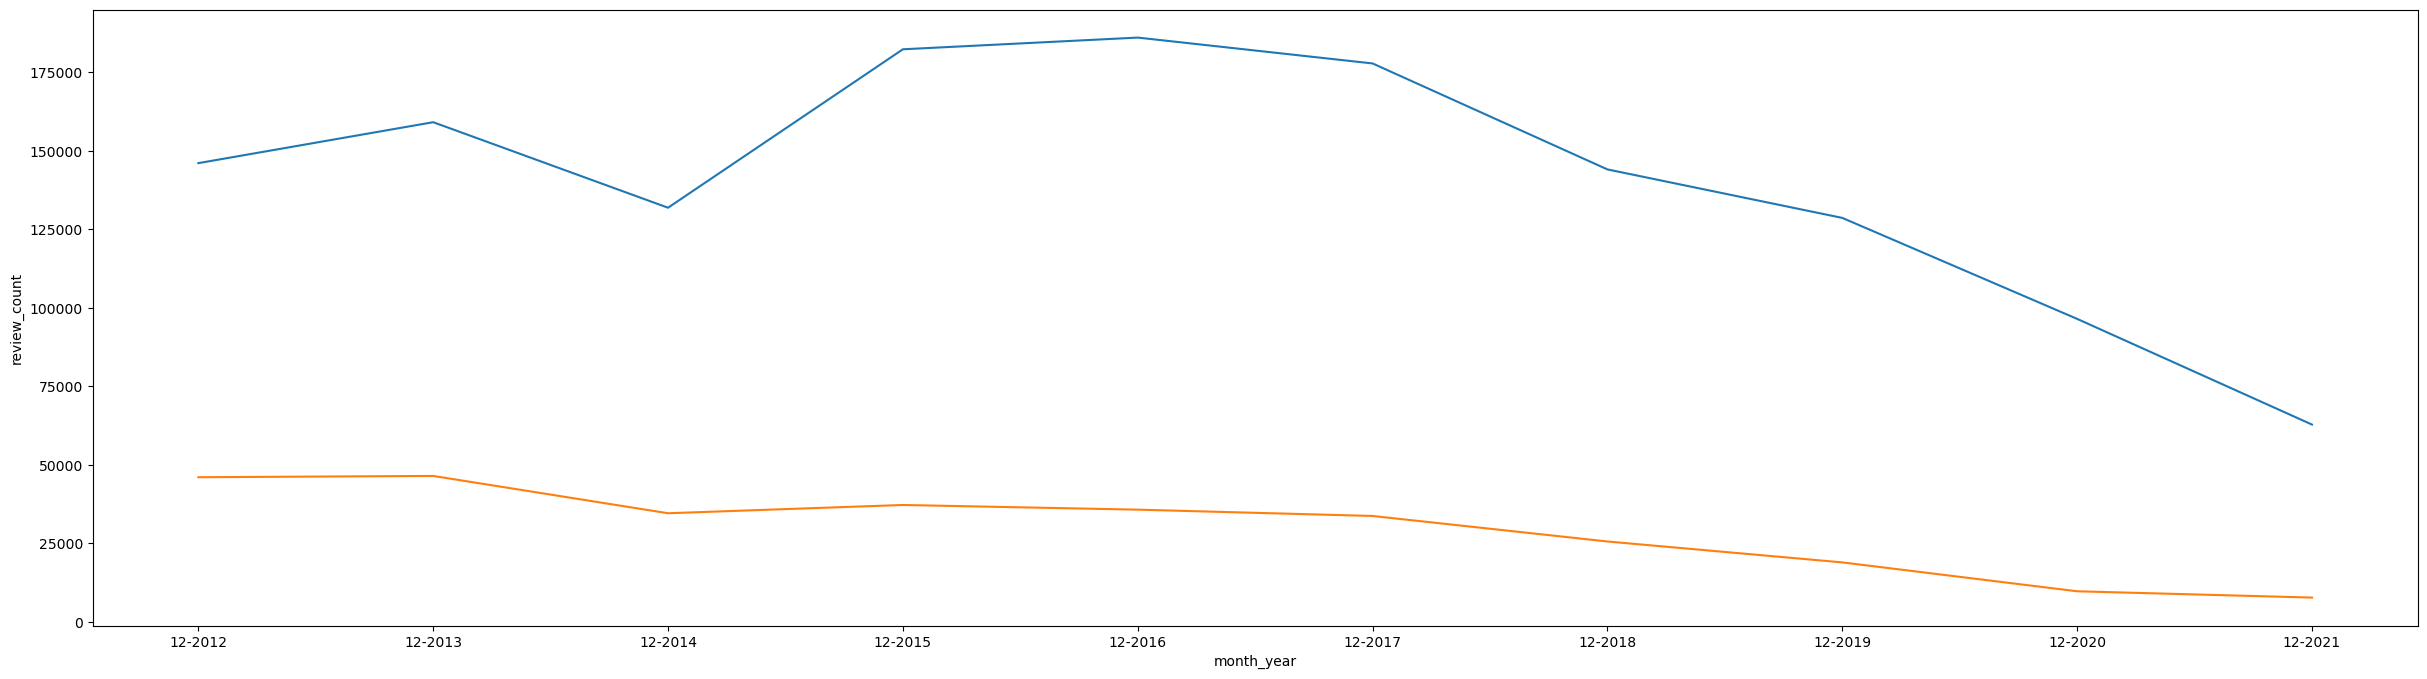

In [76]:

plt.figure(figsize=(30,8))
sns.lineplot(x=high_eng["month_year"],y=high_eng["review_count"])
sns.lineplot(x=low_eng["month_year"],y=low_eng["review_count"])

# sentiment of the review and tips based on useful , funny , cool

In [77]:
pd.read_sql_query("""select * from review
limit 1""",conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\598191573.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""select * from review


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07


In [78]:
business_ids = tuple(business_id["business_id"])


sentiment_df=pd.read_sql_query("""select b.business_id , avg(b.stars) as avg_rating , sum(b.review_count) as review_count ,
sum(r.useful) as sum_useful , sum(r.funny) as sum_funny , sum(r.cool) as sum_cool
from review as r
join business as b on r.business_id=b.business_id
where b.business_id in {}
group by b.business_id
order by review_count
""".format(business_ids ),conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\1227798282.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sentiment_df=pd.read_sql_query("""select b.business_id , avg(b.stars) as avg_rating , sum(b.review_count) as review_count ,


In [79]:
sentiment_df

,business_id,avg_rating,review_count,sum_useful,sum_funny,sum_cool
0,y4LG4ox7twejZ9F-G3P4Vw,4.0,25.0,2.0,0.0,1.0
1,Y5rH3pjH48VKoSKdpivz_g,4.5,25.0,4.0,1.0,1.0
2,Y7heoil4m3fGzu88Up8VXw,4.0,25.0,51.0,27.0,40.0
3,Y9GZffGOGg5EBtErDaDHgw,4.0,25.0,4.0,0.0,0.0
4,yAwSBNIaS2OaRcwuPTJOoQ,2.0,25.0,5.0,4.0,0.0
...,...,...,...,...,...,...
31532,wJiaLWAxfqDeFsmE2cI8tg,3.5,65392.0,390.0,159.0,138.0
31533,J88JV53EPyDjj7lT0Cm9wA,3.0,65455.0,199.0,57.0,79.0
31534,98WBvrn7wzu_93zc7fRfzQ,4.0,65720.0,181.0,74.0,62.0
31535,LTyQL15LCWxxKLfWn2hXRw,3.5,65928.0,220.0,50.0,77.0


# removing the outliers for the sentiment df

In [80]:
sentiment_df=remove_outliers(sentiment_df,"review_count")
sentiment_df=remove_outliers(sentiment_df,"sum_useful")
sentiment_df=remove_outliers(sentiment_df,"sum_funny")
sentiment_df=remove_outliers(sentiment_df,"sum_cool")

In [81]:
sentiment_df

,business_id,avg_rating,review_count,sum_useful,sum_funny,sum_cool
0,y4LG4ox7twejZ9F-G3P4Vw,4.0,25.0,2.0,0.0,1.0
1,Y5rH3pjH48VKoSKdpivz_g,4.5,25.0,4.0,1.0,1.0
3,Y9GZffGOGg5EBtErDaDHgw,4.0,25.0,4.0,0.0,0.0
4,yAwSBNIaS2OaRcwuPTJOoQ,2.0,25.0,5.0,4.0,0.0
5,YbpNzwI5iBvsBDwdwc9Mmg,5.0,25.0,1.0,0.0,0.0
...,...,...,...,...,...,...
27196,u1uWs6f1NN_jMVIN-r-E-w,3.5,15738.0,46.0,11.0,19.0
27199,9cOgjbxMXq1bL5dJikc6pg,1.5,15744.0,87.0,23.0,22.0
27204,SNuTYRfrIRpBwswsXHj1lw,3.0,15748.0,59.0,12.0,28.0
27209,L8ny0WbdhoZSCicHh_fBCA,2.5,15748.0,76.0,22.0,22.0


In [82]:
sentiment_df["success_score"]=cal_success_metrics(sentiment_df)

In [83]:
sentiment_df

,business_id,avg_rating,review_count,sum_useful,sum_funny,sum_cool,success_score
0,y4LG4ox7twejZ9F-G3P4Vw,4.0,25.0,2.0,0.0,1.0,13.032386
1,Y5rH3pjH48VKoSKdpivz_g,4.5,25.0,4.0,1.0,1.0,14.661434
3,Y9GZffGOGg5EBtErDaDHgw,4.0,25.0,4.0,0.0,0.0,13.032386
4,yAwSBNIaS2OaRcwuPTJOoQ,2.0,25.0,5.0,4.0,0.0,6.516193
5,YbpNzwI5iBvsBDwdwc9Mmg,5.0,25.0,1.0,0.0,0.0,16.290483
...,...,...,...,...,...,...,...
27196,u1uWs6f1NN_jMVIN-r-E-w,3.5,15738.0,46.0,11.0,19.0,33.823639
27199,9cOgjbxMXq1bL5dJikc6pg,1.5,15744.0,87.0,23.0,22.0,14.496417
27204,SNuTYRfrIRpBwswsXHj1lw,3.0,15748.0,59.0,12.0,28.0,28.993596
27209,L8ny0WbdhoZSCicHh_fBCA,2.5,15748.0,76.0,22.0,22.0,24.161330


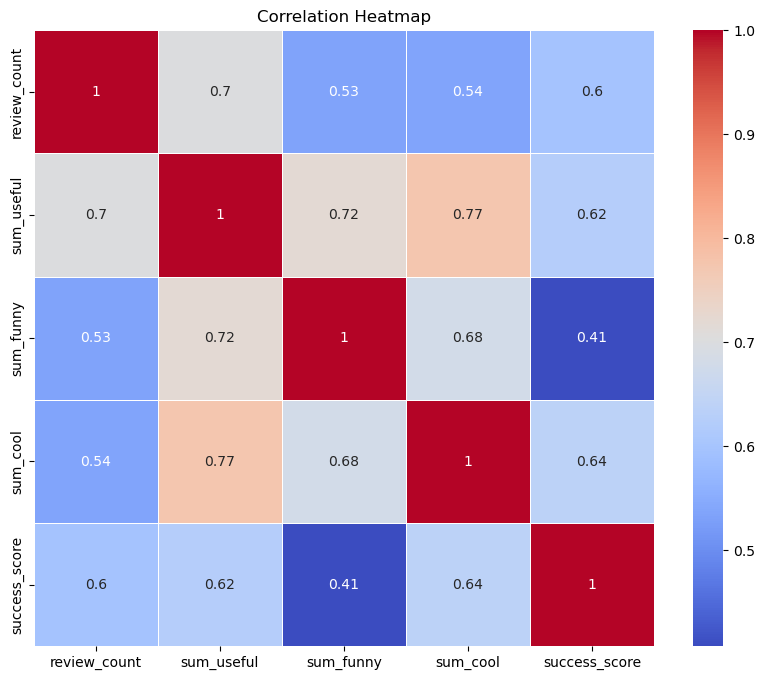

In [84]:

selected_columns = sentiment_df.iloc[:, 2:]

correlation_matrix = selected_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# review_counnt in elite, nonelite user 

In [85]:
pd.read_sql_query("""select * from user
limit 1
""",conn)

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\101184570.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""select * from user


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25,7217,1259,5994,2007,267,3.91,...,65,55,56,18,232,844,467,467,239,180


In [87]:

query = """
SELECT elite,
       COUNT(*) AS no_of_users,
       SUM(review_count) AS total_review_count 
FROM 
(
    SELECT CASE 
             WHEN elite IS NULL OR elite = 'None' THEN 'Not Elite'
             ELSE 'Elite'
           END AS elite,
           review_count
    FROM user
) AS user_elite
GROUP BY elite;
"""

user_elite = pd.read_sql_query(query, conn)



C:\Users\jeeva\AppData\Local\Temp\ipykernel_13304\4214887389.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_elite = pd.read_sql_query(query, conn)


In [88]:
user_elite

,elite,no_of_users,total_review_count
0,Elite,91198,20484441.0
1,Not Elite,1896699,26021235.0


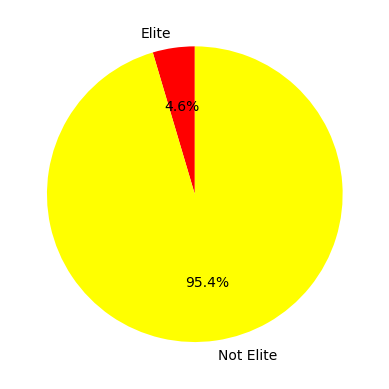

In [89]:

colors = ["red",'yellow'] 
plt.pie(user_elite["no_of_users"],labels =user_elite["elite"],autopct='%1.1f%%',startangle=90
    ,colors=colors   )
plt.show()

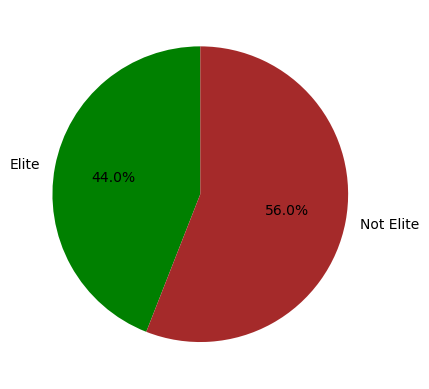

In [90]:

colors = ["green",'brown'] 
plt.pie(user_elite["total_review_count"],labels =user_elite["elite"],autopct='%1.1f%%',startangle=90
    ,colors=colors   )
plt.show()